<a href="https://colab.research.google.com/github/Micoria/applied-artificial-intelligence-in-healthcare/blob/main/Lab1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Karolinska Institutet|Applied AI in Healthcare**
## Lab1 - K-Nearest Neighbor
### In this lab, we review the basic concept of KNN method on a toy dataset and a real challenging problem as well.


```
# mehdi.astaraki@ki.se
```



In [6]:
# Importing the required modules and libraries
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### The lab will be divided into two section. In the first part, we implement a non-optimal KNN algorithm step by step. In the second part, we will employ an optimal implementation of KNN model from the standard Scikit-learn library.
### *Starting with Part 1:*

In [7]:
# Step1: definint a function to calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [8]:
# Creating a simple dataset; each instance contains 2 values (2-dimension).
# the third value represent the class labels (binary).
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

Text(0.5, 1.0, 'scatter plot')

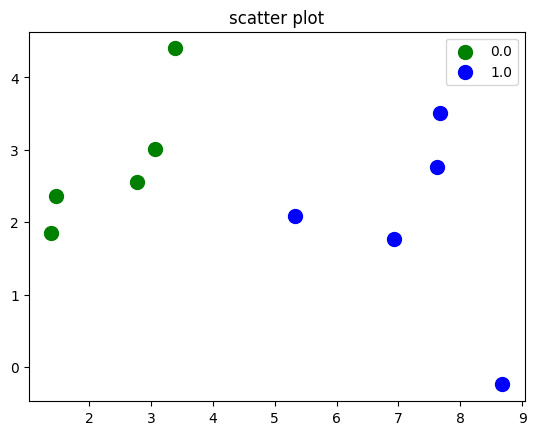

In [9]:
# visualizing the data
dataset_np = np.array(dataset)
color_dict = {0: 'green', 1: 'blue'}

fig, ax = plt.subplots()
for g in np.unique(dataset_np[:,2]):
    ix = np.where(dataset_np[:,2] == g)
    ax.scatter(dataset_np[ix,0], dataset_np[ix,1], c = color_dict[g], label = g, s = 100)
ax.legend()
plt.title('scatter plot')

In [10]:
# Employing the "euclidean_distance" to calculate distances
row0 = dataset[0]
for row in enumerate(dataset):
	distance = euclidean_distance(row0, row[1])
	print('distance from datapoint 1 to datapoint {} is {}'.format(row[0]+1, distance))

distance from datapoint 1 to datapoint 1 is 0.0
distance from datapoint 1 to datapoint 2 is 1.3290173915275787
distance from datapoint 1 to datapoint 3 is 1.9494646655653247
distance from datapoint 1 to datapoint 4 is 1.5591439385540549
distance from datapoint 1 to datapoint 5 is 0.5356280721938492
distance from datapoint 1 to datapoint 6 is 4.850940186986411
distance from datapoint 1 to datapoint 7 is 2.592833759950511
distance from datapoint 1 to datapoint 8 is 4.214227042632867
distance from datapoint 1 to datapoint 9 is 6.522409988228337
distance from datapoint 1 to datapoint 10 is 4.985585382449795


In [11]:
# finding the nearest neighbor
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

neighbors = get_neighbors(dataset, dataset[0], 3)

for neighbor in neighbors:
	print('the closest data neighbors are {}'.format(neighbor))

the closest data neighbors are [2.7810836, 2.550537003, 0]
the closest data neighbors are [3.06407232, 3.005305973, 0]
the closest data neighbors are [1.465489372, 2.362125076, 0]


In [12]:
# Make a classification prediction by using neighboring data (majority voting)
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [13]:
# predict the class label of an instance
prediction = predict_classification(dataset, dataset[0], 3)
print('real label is {} and predicted label is {}'.format(dataset[0][-1], prediction))

real label is 0 and predicted label is 0


### *Part 2*
### Standard KNN with SKLearn
### Toy dataset


In [14]:
# loading a built-in dataset
data = load_breast_cancer()
feature_set = data.data
class_label = data.target

m,n = feature_set.shape
print('dataset contains {} subjects each of which is presented with {} features'.format(m,n))

dataset contains 569 subjects each of which is presented with 30 features


From 569 data 212 are Zero labels and 357 are labeled as One


Text(0.5, 1.0, 'Breats Cancer Data')

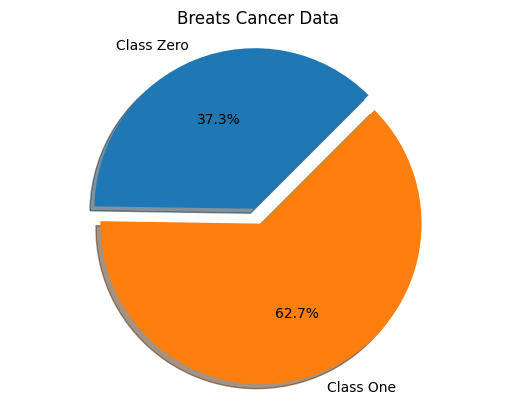

In [15]:
# visualizing the data distribution

label_set_tuple = tuple(class_label)
zero_frequency = label_set_tuple.count(0)
one_frequency = label_set_tuple.count(1)
print('From {} data {} are Zero labels and {} are labeled as One'.format(
    len(label_set_tuple),zero_frequency, one_frequency))
data_labels = ('Class Zero', 'Class One')
values = [zero_frequency, one_frequency]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=data_labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')
plt.title('Breats Cancer Data')

In [16]:
# splitting the dataset into train&test subsets
seed = 102
X_train, X_test, y_train, y_test = train_test_split(feature_set, class_label, test_size=0.25, random_state=seed)
X_test.shape

(143, 30)

In [17]:
classifier = KNeighborsClassifier(n_neighbors=3) # instantiating and compiling the model
classifier.fit(X_train, y_train) # training the model with training data
y_pred = classifier.predict(X_test) # using the trained model for prediction of a new instance
accuracy_score(y_test, y_pred) # evaluate the model performance

0.965034965034965

Text(0, 0.5, 'Accuracy')

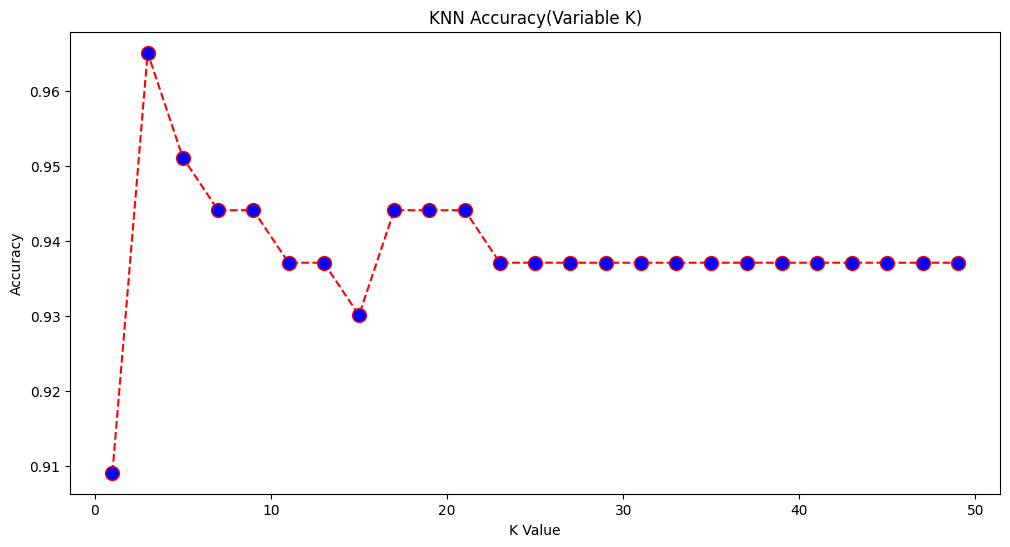

In [18]:
# investigate the effect of parameter "K"
acc_vals = []
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc_vals.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(12, 6))
plt.plot(range(1,50,2), acc_vals, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('KNN Accuracy(Variable K)')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

### A challenging probelm: Benign-Malignancy classification of Lung Nodules from LDCT images
##### LDCT scans of more than 1000+ subjects were analyzed and from each pulmonary nodules more than 1000 features were extracted. These features can be used to classify benign nodules from malignant ones:

In [19]:
# defining a function to load the feature set
def load_radiomic_set(feature_path):
    '''
    loading radiomics features saved in a .csv file
    Parameters
    ----------
    feature_path : str
        full path to the .csv file.
    Returns
    -------
    subject_ids : list
    feature_values : array
    label_values : array
    '''
    features_df = pd.read_csv(feature_path)
    features_names = list(features_df.keys()) # == list(features_df.column)
    features_names = features_names[3:]       # getting the feature names
    subject_ids =  list(features_df[features_df.columns[1]]) # get the subject ids
    label_values = np.asarray(list(features_df[features_df.columns[2]])) # get the subject labels
    feature_values = features_df.values  # get the feature values
    feature_values = feature_values[:,3:] # the first 3 columns contain order, id, labels
    feature_values = feature_values.astype(np.float32)

    return subject_ids ,features_names, feature_values, label_values

**Authorizing access from Google colab to Google drive to load the dataset.**

In [20]:
# Mounting your Google Drive to your Colab.
from google.colab import drive
drive.mount('/content/drive')
!ln -s "/content/drive/My Drive" /gdrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ln: failed to create symbolic link '/gdrive/My Drive': Input/output error


In [21]:
# used the loader function to load the dataset from your GoogleDrive
path_to_csv = '/gdrive/Applied AI in Healthcare/Lab1/lung_cancer.csv'
subject_ids ,features_names, feature_values, label_values = load_radiomic_set(path_to_csv)

first_five_features = features_names[:5]
print('Name of the first five features are: {}'.format(first_five_features))
first_five_subjects = subject_ids[:5]
print('Name of the first five subject IDs are: {}'.format(first_five_subjects))
first_five_labels = label_values[:5]
print('Name of the first five class labels are: {}'.format(first_five_labels))

Name of the first five features are: ['original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn']
Name of the first five subject IDs are: ['c928b4fee44ea322ac65348ae2ff20b8_cropped', '91ee390b30927af8804d1f2adf2aefa8_cropped', '76fff2029e577190ce0bf070192b889e_cropped - Copy', 'f43843b39a5be8cd30dab59bd11499ed_cropped - Copy', '184fa4ae2b7ae010625d89f10186f1c5_cropped']
Name of the first five class labels are: [0 0 0 0 1]


In [22]:
# some information regarding the dataset
n_subject, n_features = feature_values.shape
print('We have {} subjects from each {} features were extratced'.format(n_subject, n_features))

We have 1297 subjects from each 1334 features were extratced


From 1297 data 876 are Zero labels and 421 are labeled as One


Text(0.5, 1.0, 'Lung nodule')

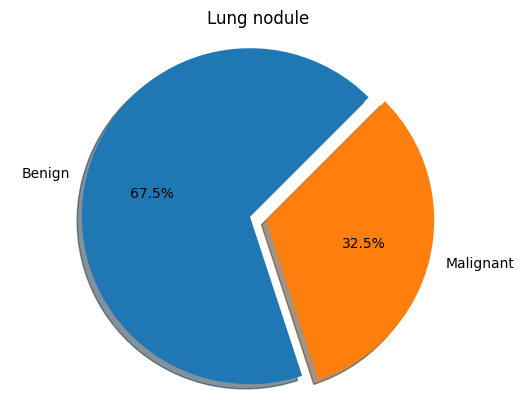

In [23]:
# visualizing the data distribution

label_set_tuple = tuple(label_values)
benign_frequency = label_set_tuple.count(0)
malignant_frequency = label_set_tuple.count(1)
print('From {} data {} are Zero labels and {} are labeled as One'.format(
    len(label_set_tuple),benign_frequency, malignant_frequency))
data_labels = ('Benign', 'Malignant')
values = [benign_frequency, malignant_frequency]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=data_labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')
plt.title('Lung nodule')

In [24]:
# splitting the data into train-test subsets
seed = 1154
X_train, X_test, y_train, y_test = train_test_split(feature_values, label_values, test_size=0.25, random_state=seed)
print('there are {} subjects for training and {} for test sets.'.format(X_train.shape[0],X_test.shape[0]))

there are 972 subjects for training and 325 for test sets.


In [25]:
# training a KNN and evaluating its performance on the test set

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.6923076923076923

Text(0, 0.5, 'Accuracy')

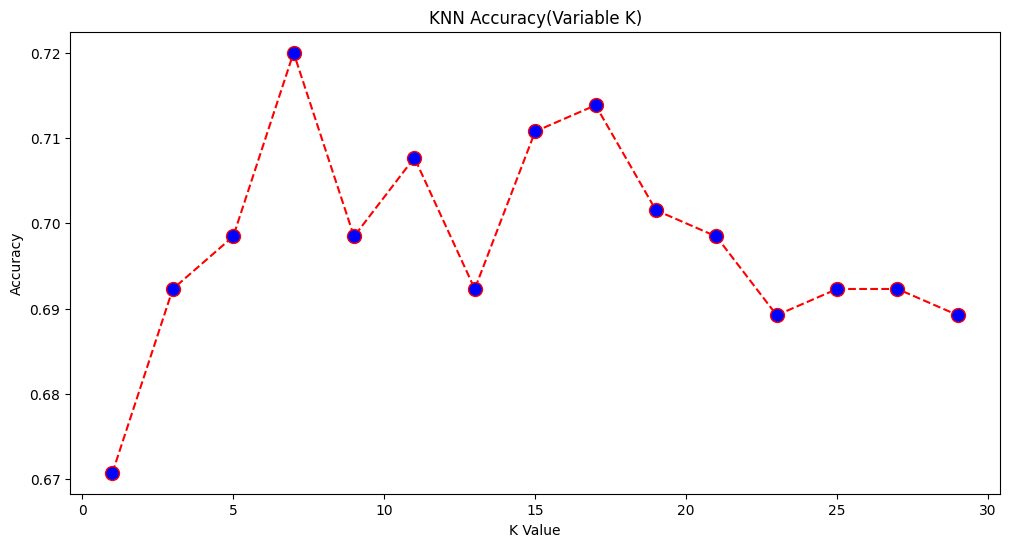

In [26]:
# investigating the impact of parameter "K"
acc_vals = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    acc_vals.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(12, 6))
plt.plot(range(1,30,2), acc_vals, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('KNN Accuracy(Variable K)')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
